# Special functions

In the following demo, we demonstrate use cases of two functions that may be imported from the `autodiff.math` module: `Sin` and `Exp`, as examples of how the derivative of expressions incorporating these special functions may be obtained.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from autodiff.autodiff import Var
from autodiff.math import Sin, Exp

## `Sin` function

We begin by defining a single-variable function

$$
f(x) = 2\sin\left(x\right)
$$

in terms of $x$, whose value is uninitialized.

In [2]:
x = Var()
f = 2*Sin(x)

We compute the value of $f$ and its derivative with respect to $x$ at selected points on the interval $[0,8\pi]$ by assigning variable $x$ its value at each point, evaluating the `value` attribute of $f$, and computing the derivative with the `der` method.

In [3]:
xval = np.arange(0,8*np.pi+.01,0.01)
fval = np.zeros(len(xval))
fder = np.zeros(len(xval))
for i, val in enumerate(xval):
    x.set_value(val)
    fval[i] = f.value
    fder[i] = f.der(x)

Finally we plot $f$ and its derivative, along with the analytical solution $f^{\prime}(x) = 2\cos\left(x\right)$ for comparison.

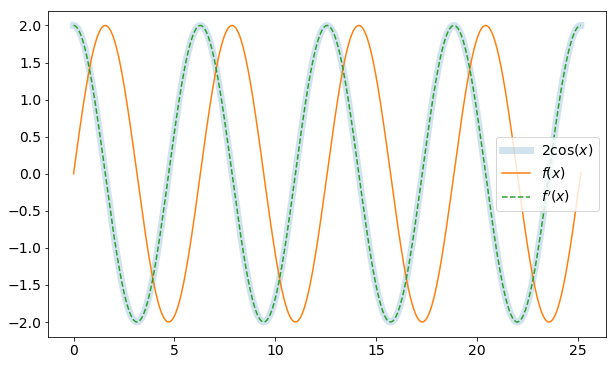

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(xval, 2*np.cos(xval), linewidth=7, alpha=0.2, label='$2\\cos(x)$')
ax.plot(xval, fval, label='$f(x)$')
ax.plot(xval, fder, linestyle='dashed', label='$f^{\\prime}(x)$')

plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

## `Exp` function

Next we look at a common mathematical model involving the exponential - the logistic equation for population growth:

$$
N(t) = \dfrac{K}{1+\left(\dfrac{K}{N_i}-1\right)e^{-rt}}
$$

where
$N(t)$ is the population at time $t$,

$r$ is the rate of maximum population growth,

$K$ is the carrying capacity, and

$N_i$ is the initial population at $t=0$.

As we will seek the derivative of the model with respect to $t$, we use the `autodiff.math` module's `Exp` function when defining the `logistic_growth` function:

In [5]:
def logistic_growth(t,r,K,Ni):
    # r is the rate of maximum population growth
    # K is the carrying capacity
    # Ni is the initial population
    # returns the population at time t
    fac = (K/Ni-1)
    return K/(1+fac*Exp(-r*t))

We track the evolution of a population with a maximum growth rate $r=0.5$, carrying capacity $K$ normalized to 1, and varied initial population sizes $N_i \in [0.05,0.95]$, on a time interval $t = [0,10]$. The variable $t$ is an `autodiff` variable, so we can compute the derivative of $N$ with respect to $t$ corresponding to each $N_i$ and timestep.

In [6]:
t = Var()
r = 0.5
K = 1
Ns = np.arange(0.05,1,0.05)

tval = np.arange(0,10.01,0.01)
Nval = np.zeros((len(Ns),len(tval)))
Nder = np.zeros((len(Ns),len(tval)))

for i,Ni in enumerate(Ns):
    N = logistic_growth(t,r,K,Ni)
    for j, val in enumerate(tval):
        t.set_value(val)
        Nval[i,j] = N.value
        Nder[i,j] = N.der(t)

Finally, we visualize the results below.

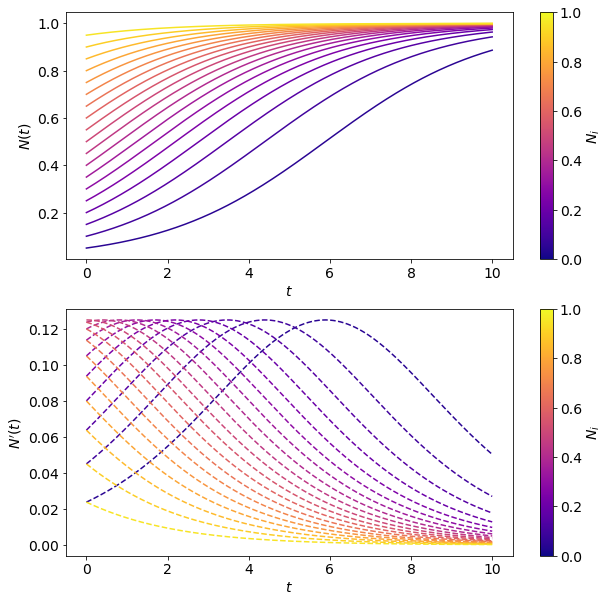

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
cmap = plt.cm.get_cmap('plasma')
for i,Ni in enumerate(Ns):
    col = cmap(Ni)
    ax1.plot(tval, Nval[i,:], color=col)
    ax2.plot(tval, Nder[i,:], color=col, linestyle='dashed')

# axes
ax1.set_xlabel('$t$',size=14)
ax1.set_ylabel('$N(t)$',size=14)
ax1.tick_params(labelsize=14)
ax2.set_xlabel('$t$',size=14)
ax2.set_ylabel('$N^{\\prime}(t)$',size=14)
ax2.tick_params(labelsize=14)

# colorbars
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar1 = plt.colorbar(sm, ax=ax1)
cbar1.set_label('$N_i$',size=14)
cbar1.ax.tick_params(labelsize=14) 
cbar2 = plt.colorbar(sm, ax=ax2)
cbar2.set_label('$N_i$',size=14)
cbar2.ax.tick_params(labelsize=14) 

plt.show()